# Homework - Luis Enrique Valenzuela Navarro

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
import networkx as nx
import matplotlib.pylab as plt
import os
import random
import numpy as np
from random import randint
%matplotlib inline
import itertools 
from itertools import permutations
from sklearn.metrics import mean_absolute_error
import math
from random import seed
from random import random  

We import the Facebook 100 dataset files from our Google Drive.

In [ ]:
path = '/content/drive/MyDrive/Network Analysis & Modeling/fb100/'
files = os.listdir(path)
nfiles = len(files)

##Question 2: Social Network Analysis with the Facebook100 Dataset

We import Caltech, MIT, Johns Hopkins graphs from the Facebook dataset files from our Google Drive.

In [179]:
Caltech = nx.read_graphml(path + "Caltech36.graphml")
MIT = nx.read_graphml(path + "MIT8.graphml")
JHopking = nx.read_graphml(path + "Johns Hopkins55.graphml")

### deg_graph(G):

The following function plots degrees as a function of number of nodes, obtaining a list with the degrees of each node to be able to be graphed. It receives as parameters a graph that belongs to the Facebook 100 Dataset.

In [180]:
def deg_graph(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

  fig = plt.figure("Degree", figsize=(10, 10))
  axgrid = fig.add_gridspec(5, 4)

  ax2 = fig.add_subplot(axgrid[3:, 2:])
  ax2.bar(*np.unique(degree_sequence, return_counts=True))
  ax2.set_title("Degree histogram")
  ax2.set_xlabel("Degree")
  ax2.set_ylabel("# of Nodes")

  fig.tight_layout()
  plt.show()

### plt_degree(G)

The following function return a list of the degree of all the nodes. It receives as parameters a graph that belongs to the Facebook 100 Dataset.

In [187]:
def plt_degree(G):
  return [val for (node, val) in G.degree]

### plt_clustering(G)

The following function return a list of clustering coefficient all the nodes. It receives as parameters a graph that belongs to the Facebook 100 Dataset.

In [188]:
def plt_clustering(G):
  return list(nx.clustering(G).values())

### (a) For these three networks plot the degree distribution for each of the three networks that you downloaded. What are you able to conclude from these degree distributions?

**Caltech**

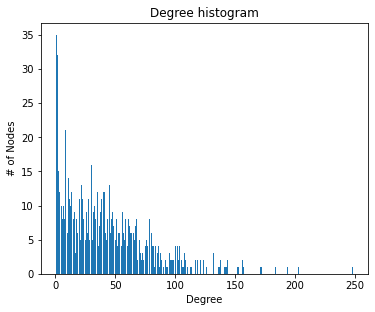

In [181]:
deg_graph(Caltech)

**MIT**

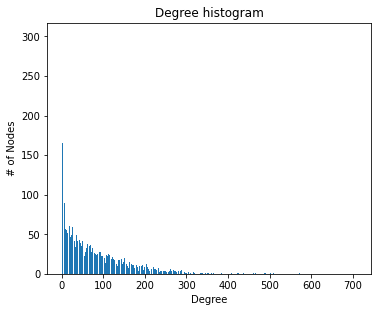

In [182]:
deg_graph(MIT)

**Johns Hopkins**

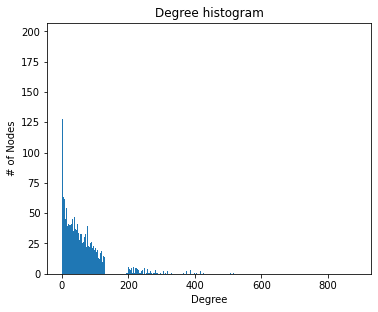

In [183]:
deg_graph(JHopking)

We can see through the graphs that there is a great variety of students with many connections, but these connections are of low degree. This may be because they are new students to the network and may not have as many friends, or they may be new students who do not know anyone and therefore do not have as many connections.

### (b) Compute the global clustering coefficient and mean local clustering coefficient for each of the two networks. In addition compute the edge density of each network. Should either of these networks be construed as sparse?

**Global Clustering**: The next code calculates graph transitivity, the fraction of all possible triangles present in the graph received as parameter.



In [184]:
GCCaltech = nx.transitivity(Caltech)
GCMIT = nx.transitivity(MIT)
GCJHopking = nx.transitivity(JHopking)

print('Global clustering of Caltech: ', GCCaltech)
print('Global clustering of MIT: ', GCMIT)
print('Global clustering of John Hopkins: ', GCJHopking)

Global clustering of Caltech:  0.2912826901150874
Global clustering of MIT:  0.18028845093502427
Global clustering of John Hopkins:  0.19316123901594015


**Mean Local Clustering**: The next code calculates the average clustering coefficient for the graph received as parameter.

In [185]:
MLCCaltech = nx.average_clustering(Caltech)
MLCMIT = nx.average_clustering(MIT)
MLCJHopking = nx.average_clustering(JHopking)

print('Mean local clustering of Caltech: ', MLCCaltech)
print('Mean local clustering of MIT: ', MLCMIT)
print('Mean local clustering of John Hopkins: ', MLCJHopking)

Mean local clustering of Caltech:  0.40929439048517247
Mean local clustering of MIT:  0.2712187419501315
Mean local clustering of John Hopkins:  0.26839307371293525


**Edge Density**: The next code calculates the density for the graph received as parameter.

In [186]:
EDCaltech = nx.density(Caltech)
EDMIT = nx.density(MIT)
EDJHopking = nx.density(JHopking)

print('Edge Density of Caltech: ', EDCaltech)
print('Edge Density of MIT: ', EDMIT)
print('Edge Density of John Hopkins: ', EDJHopking)

Edge Density of Caltech:  0.05640442132639792
Edge Density of MIT:  0.012118119495041378
Edge Density of John Hopkins:  0.013910200162372396


Yes, I consider them as sparse. The values obtained in Global Clustering, Mean Local Clustering and Edge Density show us a low interconnection between the nodes. Which makes sense with the statement made in the previous question.

### (c) For each network, also draw a scatter plot of the degree versus local clustering coefficient. Based on these calculations as well as your previous ones, are you able to draw any conclusions about any similarities or differences between the tree networks? What other observations can you make?


**Caltech**

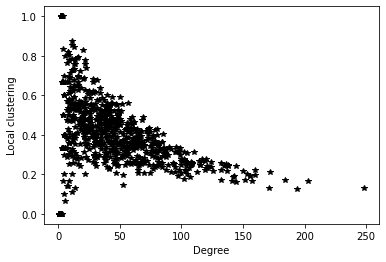

In [189]:
plt.xlabel(r"Degree")
plt.ylabel(r"Local clustering")

plt.plot(plt_degree(Caltech), plt_clustering(Caltech),"*", color='black');

**MIT**

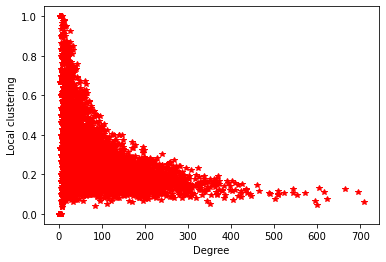

In [190]:
plt.xlabel(r"Degree")
plt.ylabel(r"Local clustering")

plt.plot(plt_degree(MIT), plt_clustering(MIT),'*', color='red');

**Johns Hopkins**

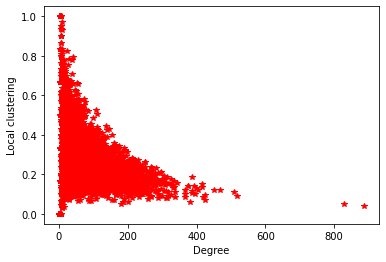

In [191]:
plt.xlabel(r"Degree")
plt.ylabel(r"Local clustering")

plt.plot(plt_degree(JHopking), plt_clustering(JHopking),'*', color='red');

We can observe in the three graphs that the nodes are interconnected mostly in low degrees. This reaffirms the hypothesis raised in question (a). If we look at MIT and John Hopkins we see that Local Clustering decreases exponentially as we increase the degree. This means that very few nodes in the network had large connections. A similar behavior is observed in Caltech so we could see that the nodes with the highest degree do not belong to a specific cluster. These people must be very popular in the network and that is why they cannot be grouped in a cluster.

## Question 3: Social Network Analysis with the Facebook100 Dataset




By resource topic, we selected 20 files that belong to the Facebook 100 Dataset.



In [163]:
Gs = []
for _ in range(20):
 Gs.append(None)
cont = 0
for _ in range (20):
  ruta = path + files[cont]
  print(ruta)
  Gs[cont] = nx.read_graphml(ruta)
  cont += 1


/content/drive/MyDrive/Network Analysis & Modeling/fb100/Villanova62.graphml
/content/drive/MyDrive/Network Analysis & Modeling/fb100/UCLA26.graphml
/content/drive/MyDrive/Network Analysis & Modeling/fb100/Tennessee95.graphml
/content/drive/MyDrive/Network Analysis & Modeling/fb100/NYU9.graphml
/content/drive/MyDrive/Network Analysis & Modeling/fb100/Carnegie49.graphml
/content/drive/MyDrive/Network Analysis & Modeling/fb100/GWU54.graphml
/content/drive/MyDrive/Network Analysis & Modeling/fb100/USF51.graphml
/content/drive/MyDrive/Network Analysis & Modeling/fb100/Vanderbilt48.graphml
/content/drive/MyDrive/Network Analysis & Modeling/fb100/USC35.graphml
/content/drive/MyDrive/Network Analysis & Modeling/fb100/Rutgers89.graphml
/content/drive/MyDrive/Network Analysis & Modeling/fb100/UConn91.graphml
/content/drive/MyDrive/Network Analysis & Modeling/fb100/MIT8.graphml
/content/drive/MyDrive/Network Analysis & Modeling/fb100/USFCA72.graphml
/content/drive/MyDrive/Network Analysis & Mode

We define these four functions in order to be able to graph:
1.   Assortativity as function of the networks size.
2.   Assortativity distribution.

From the networks of the Facebook 100 dataset, we investigate assortativity patterns for three attributes:

1. Dorm  
2. Major 
3. Student/Faculty Status
4. Vertex Degree







### Assortativity Graphic 

The following function plots assertiveness as a function of network size. It receives as parameters an attribute and the number of networks that belong to the Facebook 100 Dataset.

In [164]:
def assortativity_graphic(att, num_net):
  attribute = []
  size = []
  for _ in range(num_net):
    attribute.append(None)
    size.append(None)
  cont = 0
  title = att.title() + " Assortativity"
  for x in range(num_net):
    attribute[cont] = nx.attribute_assortativity_coefficient(Gs[cont], att)
    size[cont] = Gs[cont].size()
    cont += 1
  plt.xlabel(r"Network Size ")
  plt.ylabel(title)
  plt.xscale('log')
  plt.grid(axis='y', alpha=0.50)
  plt.grid(axis='x', alpha=0.50)
  plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
  plt.plot(size, attribute, '*', color='black');


### Assortativity Degree Graphic 

The following function plots assertiveness as a function of network size. It receives as parameter the number of networks that belong to the Facebook 100 Dataset.

In [165]:
def assortativity_degree_graphic(num_net):
  attribute = []
  size = []
  for _ in range(num_net):
    attribute.append(None)
    size.append(None)
  cont = 0
  title ="Degree Assortativity"
  for x in range(num_net):
    attribute[cont] = nx.degree_assortativity_coefficient(Gs[cont])
    size[cont] = Gs[cont].size()
    cont += 1
  plt.xlabel(r"Network Size ")
  plt.ylabel(title)
  plt.xscale('log')
  plt.grid(axis='y', alpha=0.50)
  plt.grid(axis='x', alpha=0.50)
  plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
  plt.plot(size, attribute, '*', color='black');


### Density Graphic 

The following function plots assertiveness distribution. In this method, a continuous curve is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation.  It receives as parameters an attribute and the number of networks that belong to the Facebook 100 Dataset.

In [166]:
import seaborn as sns
def density_graphic(att,num_net):
  attribute = []
  for _ in range(num_net):
    attribute.append(None)
  cont = 0
  title = att.title() + " Assortativity"
  for x in range(num_net):
    attribute[cont] = nx.attribute_assortativity_coefficient(Gs[cont], att)
    cont += 1
  sns.distplot(attribute, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
  plt.xlabel(title)
  plt.grid(axis='y', alpha=0.50)
  plt.grid(axis='x', alpha=0.50)
  plt.xlim(left=-0.01)
  plt.axvline(0, color='red', linestyle='dashed', linewidth=1)

### Density Degree Graphic 

The following function plots assertiveness distribution. In this method, a continuous curve is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. It receives as parameter the number of networks that belong to the Facebook 100 Dataset.

In [167]:
import seaborn as sns
def density_degree_graphic(num_net):
  attribute = []
  for _ in range(num_net):
    attribute.append(None)
  cont = 0
  title ="Degree Assortativity"
  for x in range(num_net):
    attribute[cont] = nx.degree_assortativity_coefficient(Gs[cont])
    cont += 1
  sns.distplot(attribute, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
  plt.xlabel(title)
  plt.grid(axis='y', alpha=0.50)
  plt.grid(axis='x', alpha=0.50)
  plt.xlim(left=-0.01)
  plt.axvline(0, color='red', linestyle='dashed', linewidth=1)

### Dorm

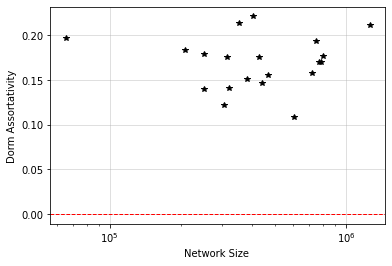

In [168]:
assortativity_graphic("dorm",20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


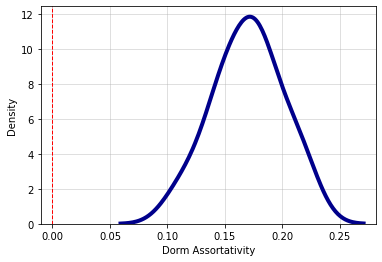

In [169]:
density_graphic("dorm",20)

### Major

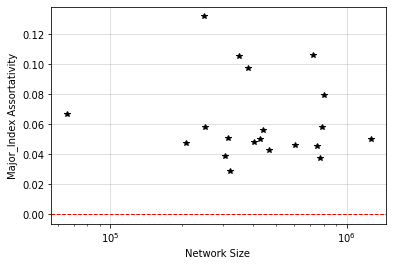

In [170]:
assortativity_graphic("major_index",20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


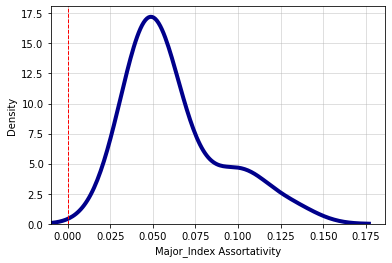

In [171]:
density_graphic("major_index",20)

### Student/Faculty Status

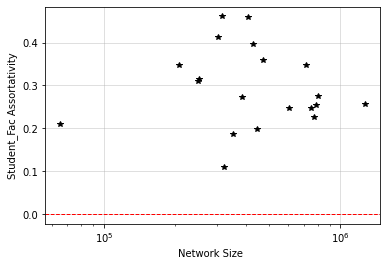

In [172]:
assortativity_graphic("student_fac",20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


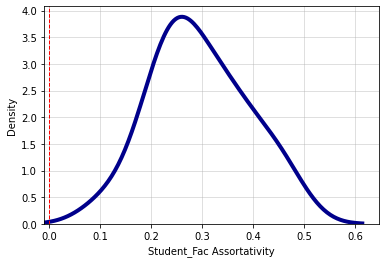

In [173]:
density_graphic("student_fac",20)

### Degree

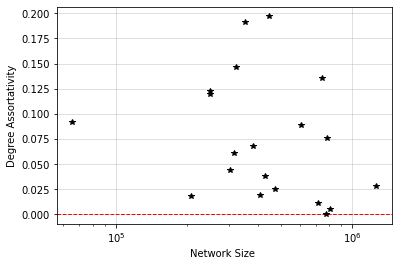

In [174]:
assortativity_degree_graphic(20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


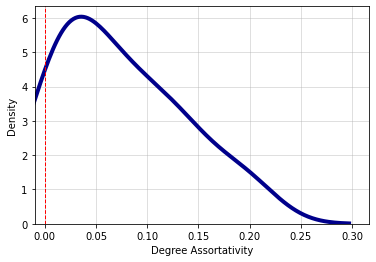

In [175]:
density_degree_graphic(20)

### Analysis



In [176]:
print(nx.attribute_assortativity_coefficient(Gs[0], "dorm"))
print(nx.attribute_assortativity_coefficient(Gs[0], "student_fac"))
print(nx.attribute_assortativity_coefficient(Gs[0], "major_index"))
print(nx.degree_assortativity_coefficient(Gs[0]))
print(Gs[0].size())

0.17631148494206905
0.46085880060278733
0.05069448097957243
0.06126868807106425
314989


With the results of the graphs seen above we can infer the following:


People within the same careers or faculties tend to relate to each other to a greater extent than those who are living in the same dorm. As human beings we seek that when creating new relationships, the people who will be part of them must have a similar assortment. There are other attributes such as the number of titles or the majors that have a lesser influence when selecting friendships within the network. The distribution of points spans the line of no assortativity, with all the values above 0. This confirms the expected behavior of people who became in-network friends within Facebook at the time the data was collected.

##Question 4: Link prediction

### (b) Implementation of the following metrics for link prediction:


1.   Common Neighbors
2.   Jacard
3.   Adamic/Adar



random_percentaje(): This function selects the percentage that will be used to calculate E_removed.

In [ ]:
def random_percentaje():
  percentaje = 0
  test = randint(1,4)
  if test == 1:
    percentaje = 0.05
  elif test == 2:
    percentaje = 0.1
  elif test == 3:
    percentaje = 0.15
  elif test == 4:
    percentaje = 0.2
  return percentaje

remove_edges(G,percentaje): This function returns the Graph (e_removed) and the subset of links that were removed from the original Graph. It receives as parameters a graph and a percentage.

In [ ]:
def remove_edges(G,percentaje):
  m = G.number_of_edges()
  e_subset = random.sample(G.edges(), int(percentaje*G.number_of_edges()))
  e_removed = G 
  e_removed.remove_edges_from(e_subset)
  edge_subset_size = len(list(e_subset))
  print("Deleted : ", str(edge_subset_size))
  print("Remaining : ", str((m - edge_subset_size)))
  return e_removed, e_subset

forIntersection(lista): This function converts a list with triples (u,v,p) to a list with pairs (u,v).

In [ ]:
def forIntersection(lista):
  retorno = []
  cont = 0
  for _ in range(len(lista)):
    retorno.append(None)
  for u, v, p in lista: 
      retorno[cont] = u,v
      cont = cont + 1
  return retorno 

intersection(lst1, lst2): This function returns the intersection between the elements of two lists.

In [ ]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

unique(G): This function returns the unique combinations of nodes (u,v) within a graph. It receives the graph as a parameter and returns a list with the combinations described above.

In [ ]:
def unique(G):
  cn_list = []
  n = len(G.nodes)
  cont1 = 0
  cont2 = 0 
  for _ in range(len(G.nodes)-1):
    for _ in range(len(G.nodes)-1):
      terna = str(cont1),str(cont2)
      cn_list.append(terna)
      cont2 = cont2 + 1
    cont2 = 0 
    cont1 = cont1 + 1
  retorno = set(tuple(sorted(x)) for x in cn_list)
  return list(retorno)

common_neighbor_cen(G): This function returns a list to which Common Neighbors have been applied for link prediction.

In [ ]:
def common_neighbor_cen(G):
  unicos = unique(G)
  cn_list = []
  n = len(unicos)
  cont1 = 0
  for _ in range(n-1):
    dupla = unicos[cont1]
    cn = sorted(nx.common_neighbors(G, dupla[0], dupla[1]))
    terna = dupla[0],dupla[1],len(cn)
    cn_list.append(terna) 
    cont1 = cont1 + 1
  return cn_list

jaccard_coeff(G): This function returns a list where Jaccard was applied for link prediction.

In [ ]:
def jaccard_coeff(G):
  jc_list = list(nx.jaccard_coefficient(G))
  return jc_list

adamic_adar(G): This function returns a list where Adamic/Adar was applied for link prediction.

In [ ]:
def adamic_adar(G):
  aa_list = list(nx.adamic_adar_index(G))
  return aa_list

takeThird(elem): This function returns the third element of an associated parameter. It is used to filter down the metric values for link prediction.

In [ ]:
def takeThird(elem):
    return elem[2]

### (c) Evaluating a link predictor:

1. Select graph Gfb(V, E) in the Facebook100 dataset.

In [142]:
ruta = path + "Caltech36.graphml"
#files[randint(0,nfiles-1)]
print(ruta)
randG = nx.read_graphml(ruta)

/content/drive/MyDrive/Network Analysis & Modeling/fb100/Caltech36.graphml


2. Randomly remove a given fraction f ∈ [0.05, 0.1, 0.15, 0.2] of edges Eremoved
from the original graph Gfb.


In [162]:
testG,subset_testG = remove_edges(randG,random_percentaje())

Deleted :  3164
Remaining :  12660


3. For each node pair in the graph |V |×|V |, for each node pair compute the link
predictor metrics of interest p, these are the predicted ”friendship” Epredict.


In [144]:
A = jaccard_coeff(testG)
B = adamic_adar(testG)
C = common_neighbor_cen(testG)

4. Sort in decreasing order of confidence as a function p from the node pair
Epredict and then we take the first n pairs of nodes E
(n)
predict.


In [145]:
A.sort(key=takeThird,reverse=True) 

In [146]:
B.sort(key=takeThird,reverse=True) 

In [147]:
C.sort(key=takeThird,reverse=True)

In [148]:
e_predict_jc = forIntersection(A)
e_predict_aa = forIntersection(B)
e_predict_cn = forIntersection(C)

In [161]:
n = randint(1,testG.number_of_edges())
print(n)
e_predict_jc_n = e_predict_jc[0:n]
e_predict_aa_n = e_predict_aa[0:n]
e_predict_cn_n = e_predict_cn[0:n]

2000


5. Compute the size of the intersection between the edge set of removed edges
and the edge set of predicted node |Eremoved ∩ E(n)predict|.

In [159]:
e_removed_inter_e_predict_jc_n = intersection(subset_testG, e_predict_jc_n)
e_removed_inter_e_predict_aa_n = intersection(subset_testG, e_predict_aa_n)
e_removed_inter_e_predict_cn_n = intersection(subset_testG, e_predict_cn_n)

In [160]:
print("Intersection between edge set of removed edges and the edge set of predicted node using Common Neighbors Metric:",len(e_removed_inter_e_predict_cn_n))
print("Intersection between edge set of removed edges and the edge set of predicted node using Jaccard Metric:",len(e_removed_inter_e_predict_jc_n))
print("Intersection between edge set of removed edges and the edge set of predicted node using Adamic/Adar Metric:",len(e_removed_inter_e_predict_aa_n))

Intersection between edge set of removed edges and the edge set of predicted node using Common Neighbors Metric: 252
Intersection between edge set of removed edges and the edge set of predicted node using Jaccard Metric: 227
Intersection between edge set of removed edges and the edge set of predicted node using Adamic/Adar Metric: 245


###  (d) Choose a couple of graphs in the facebook100 dataset run and evaluate each link predictor on them, and conclude on the efficiency of the following metrics: Common Neighbors, Jaccard, Adamic/Adar.


In [ ]:
path1 = path + "Simmons81.graphml"
path2 = path + "Reed98.graphml"
print(path1)
G1 = nx.read_graphml(path1)
G2 = nx.read_graphml(path2)

/content/drive/MyDrive/Network Analysis & Modeling/fb100/Simmons81.graphml


In [ ]:
rG1,subset_rG1 = remove_edges(G1,random_percentaje())

Deleted :  1649
Remaining :  31339


In [ ]:
rG2,subset_rG2 = remove_edges(G2,random_percentaje())

Deleted :  940
Remaining :  17872


In [ ]:
jc_G1 = jaccard_coeff(rG1)
aa_G1 = adamic_adar(rG1)
cn_G1 = common_neighbor_cen(rG1)

In [73]:
jc_G2 = jaccard_coeff(rG2)
aa_G2 = adamic_adar(rG2)
cn_G2 = common_neighbor_cen(rG2)

In [74]:
jc_G1.sort(key=takeThird,reverse=True) 

In [75]:
aa_G1.sort(key=takeThird,reverse=True) 

In [76]:
cn_G1.sort(key=takeThird,reverse=True) 

In [77]:
jc_G2.sort(key=takeThird,reverse=True) 

In [78]:
aa_G2.sort(key=takeThird,reverse=True) 

In [79]:
cn_G2.sort(key=takeThird,reverse=True) 

In [110]:
e_predict_jc_G1 = forIntersection(jc_G1)
e_predict_aa_G1 = forIntersection(aa_G1)
e_predict_cn_G1 = forIntersection(cn_G1)

In [111]:
e_predict_jc_G2 = forIntersection(jc_G2)
e_predict_aa_G2 = forIntersection(aa_G2)
e_predict_cn_G2 = forIntersection(cn_G2)

In [132]:
n1 = randint(1,rG1.number_of_edges())
print(n1)
e_predict_jc_n_G1 = e_predict_jc_G1[0:n]
e_predict_aa_n_G1 = e_predict_aa_G1[0:n]
e_predict_cn_n_G1 = e_predict_cn_G1[0:n]

28380


In [137]:
n2 = randint(1,rG2.number_of_edges())
print(n2)
e_predict_jc_n_G2 = e_predict_jc_G2[0:n]
e_predict_aa_n_G2 = e_predict_aa_G2[0:n]
e_predict_cn_n_G2 = e_predict_cn_G2[0:n]

13675


In [138]:
e_removed_inter_e_predict_jc_n_G1 = intersection(subset_rG1, e_predict_jc_n_G1)
e_removed_inter_e_predict_aa_n_G1 = intersection(subset_rG1, e_predict_aa_n_G1)
e_removed_inter_e_predict_cn_n_G1 = intersection(subset_rG1, e_predict_cn_n_G1)

In [139]:
e_removed_inter_e_predict_jc_n_G2 = intersection(subset_rG2, e_predict_jc_n_G2)
e_removed_inter_e_predict_aa_n_G2 = intersection(subset_rG2, e_predict_aa_n_G2)
e_removed_inter_e_predict_cn_n_G2 = intersection(subset_rG2, e_predict_cn_n_G2)

In [140]:
print("Intersection between edge set of removed edges and the edge set of predicted node using Common Neighbors Metric in G1:",len(e_removed_inter_e_predict_cn_n_G1))
print("Intersection between edge set of removed edges and the edge set of predicted node using Jaccard Metric in G1:",len(e_removed_inter_e_predict_jc_n_G1))
print("Intersection between edge set of removed edges and the edge set of predicted node using Adamic/Adar Metric in G1:",len(e_removed_inter_e_predict_aa_n_G1))

Intersection between edge set of removed edges and the edge set of predicted node using Common Neighbors Metric in G1: 230
Intersection between edge set of removed edges and the edge set of predicted node using Jaccard Metric in G1: 244
Intersection between edge set of removed edges and the edge set of predicted node using Adamic/Adar Metric in G1: 323


In [141]:
print("Intersection between edge set of removed edges and the edge set of predicted node using Common Neighbors Metric in G2:",len(e_removed_inter_e_predict_cn_n_G2))
print("Intersection between edge set of removed edges and the edge set of predicted node using Jaccard Metric in G2:",len(e_removed_inter_e_predict_jc_n_G2))
print("Intersection between edge set of removed edges and the edge set of predicted node using Adamic/Adar Metric in G2:",len(e_removed_inter_e_predict_aa_n_G2))

Intersection between edge set of removed edges and the edge set of predicted node using Common Neighbors Metric in G2: 327
Intersection between edge set of removed edges and the edge set of predicted node using Jaccard Metric in G2: 257
Intersection between edge set of removed edges and the edge set of predicted node using Adamic/Adar Metric in G2: 242


In [177]:
G1.number_of_edges()

31339

In [178]:
G2.number_of_edges()

17872

### Analysis

The link prediction method, in principle, provides a similarity score for each nonexisting link and for most methods, a higher score means higher likelihood that the link will appear in the future.

As we can see, G1 has a higher number of edges than G2. That is why in G2 the metric that best fits is the Common Neighbors. This is because by having fewer links it is likely that the nodes have more neighbors. This means that in Reed98 it was a smaller network and it was more likely to establish friendships because of mutual friends. In G1 we can see that the metric that best fits is Adamic/Adar. Being a sample with a greater number of links, friendships are more viable between two people if the person they have in common does not know as many people. If this condition is met, it is likely that this mutual friend will introduce them. If we wanted a more stable metric on both, I would use Jaccard. This is because we take more into account the similarities between 2 nodes (in this case people) and the more similar they are, the more likely it is to establish a friendship.

##Question 5: Find missing labels with the label propagation algorithms

### (b) Implement in python the label propagation algorithm, please consider pytorch3 and networkx4 for the development of your algorithm.

**normalize(G):**This function returns a normalized array given a graph.

In [204]:
def normalize(G):
    A = nx.to_numpy_array(G)
    D = np.sum(A, axis=1)
    Dinv = np.diag(1/D)
    return Dinv @ A

These functions are the result of the implementation of the label propagation algorithm.

In [207]:
def label_propagation(G, lbp, labels_id, tol=1e-3, max_iter=1000):
    norm = normalize(G)
    copy_ylabel = lbp.copy()
    previous = np.zeros(lbp.shape)

    for _ in range(max_iter):
        var = np.abs(np.sum(previous - lbp))
        
        if var < tol:
            break
        previous = lbp.copy()
        lbp = np.dot(norm, previous)
        lbp[labels_id] = copy_ylabel[labels_id]
        
    return lbp

In [208]:
def complete_propagation(G, label, percentage):
  N = len(G)

  ndvalues = nx.get_node_attributes(G, label)
  ulist = list(set( valor for i in ndvalues for valor in ndvalues.values()))
  nunique = len(list(ulist))
  
  per = math.ceil(N*percentage)
  lp = np.zeros((N, nunique))
  lpbk = np.zeros((N, nunique))
  
  aprox_vals = []
  index = per * math.floor(random() * 1/percentage)
  cpindex = index
  total = index + per
  cnt = 0

  for i in ndvalues:
    for j in range(nunique):
      if ndvalues[i] == ulist[j] and ndvalues[i] != 0 and index < total and index <= cnt:
          lp[int(i), j] = 0
          lpbk[int(i), j] = 1
          aprox_vals.append(cnt)
          index = index + 1
      elif ndvalues[i] == ulist[j] and ndvalues[i] != 0:
        lp[int(i), j] = 1
        lpbk[int(i), j] = 1
    cnt = cnt + 1

  lid = (lp.sum(axis=1) == 1)
  lpf = label_propagation(G, lp, lid)

  return lpf, lpbk, cpindex, per

### (c) Choose a network from The Facebook100 dataset and randomly select 10%, 20%, and 30% of of the node attributes of the network to be removed. Use the label propagation algorithm you implemented to recover the missing attributes. Perform this operation for each of the following attributes : ”dorm”, ”major” and ”gender”.

The Duke dataset was chosen for comparison with the results provided in the project assignment document.

In [198]:
Duke = nx.read_graphml(path+"Duke14.graphml")

### 10%

In [209]:
Dorm_10_lp, Dorm_10_lpbk, Dorm_10_index, Dorm_10_percentage = complete_propagation(Duke, 'dorm', 0.1)

In [210]:
Major_10_lp, Major_10_lpbk, Major_10_index, Major_10_percentage = complete_propagation(Duke, 'major_index', 0.1)

In [211]:
Gender_10_lp, Gender_10_lpbk, Gender_10_index, Gender_10_percentage = complete_propagation(Duke, 'gender', 0.1)

### 20%

In [212]:
Dorm_20_lp, Dorm_20_lpbk, Dorm_20_index, Dorm_20_percentage = complete_propagation(Duke, 'dorm', 0.2)

In [213]:
Major_20_lp, Major_20_lpbk, Major_20_index, Major_20_percentage = complete_propagation(Duke, 'major_index', 0.2)

In [214]:
Gender_20_lp, Gender_20_lpbk, Gender_20_index, Gender_20_percentage = complete_propagation(Duke, 'gender', 0.2)

### 30%

In [215]:
Dorm_30_lp, Dorm_30_lpbk, Dorm_30_index, Dorm_30_percentage = complete_propagation(Duke, 'dorm', 0.3)

In [216]:
Major_30_lp, Major_30_lpbk, Major_30_index, Major_30_percentage = complete_propagation(Duke, 'major_index', 0.3)

In [217]:
Gender_30_lp, Gender_30_lpbk, Gender_30_index, Gender_30_percentage = complete_propagation(Duke, 'gender', 0.3)

### (d) For each case of the following percentage of missing attributes: 10%, 20% and 30% and for each of the following attributes: the ”dorm”, ”major”, ”gender” show the mean absolute error and accuracy score of the label propagation algorithm as in the example provided in Table 1 for the Duke University Facebook network.


The following function get the acurracy, receives as parameter the predicted matrix, the copy of the label, the initial value and the percentage.

In [218]:
def get_accuracy(label_predict, label_backup, index, per):
  labels_id = (label_backup.sum(axis=1) == 1)
  prom = 0
  count = index
  tot = 0

  while (count < (per + index)):
    if (labels_id[count]):
      tot = tot + 1
      acc = 0
      greater_val = 0
      for value in label_backup[count]:
        if value != 0:
          break;
        acc = acc + 1
      for value in label_predict[count]:
        if value > greater_val:
          greater_val = value
      if (label_predict[count][acc] >= (1 /(len(label_predict[count]) -1)) and label_predict[count][acc] >= greater_val):
        prom = prom + 1
    count = count + 1
  return prom/tot

### 10%

In [219]:
Dorm_10_accuracy = get_accuracy(Dorm_10_lp, Dorm_10_lpbk, Dorm_10_index, Dorm_10_percentage)
print("Accuracy : ", Dorm_10_accuracy)

# Mean Absolute Error
labels_id = (Dorm_10_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Dorm_10_lpbk[labels_id], Dorm_10_lp[labels_id])

Accuracy :  0.5276595744680851
Mean Absolute Error: 


0.0016751861605842331

In [221]:
Major_10_accuracy = get_accuracy(Major_10_lp, Major_10_lpbk, Major_10_index, Major_10_percentage)
print("Accuracy : ", Major_10_accuracy)

# Mean Absolute Error
labels_id = (Major_10_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Major_10_lpbk[labels_id], Major_10_lp[labels_id])

Accuracy :  0.26962025316455696
Mean Absolute Error: 


0.003294168266075945

In [222]:
Gender_10_accuracy = get_accuracy(Gender_10_lp, Gender_10_lpbk, Gender_10_index, Gender_10_percentage)
print("Accuracy : ", Gender_10_accuracy)

# Mean Absolute Error
labels_id = (Gender_10_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Gender_10_lpbk[labels_id], Gender_10_lp[labels_id])

Accuracy :  0.6723356009070295
Mean Absolute Error: 


0.032398749577001645

### 20%

In [223]:
Dorm_20_accuracy = get_accuracy(Dorm_20_lp, Dorm_20_lpbk, Dorm_20_index, Dorm_20_percentage)
print("Accuracy : ", Dorm_20_accuracy)

# Mean Absolute Error
labels_id = (Dorm_20_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Dorm_20_lpbk[labels_id], Dorm_20_lp[labels_id])

Accuracy :  0.5014184397163121
Mean Absolute Error: 


0.003432761129857053

In [224]:
Major_20_accuracy = get_accuracy(Major_20_lp, Major_20_lpbk, Major_20_index, Major_20_percentage)
print("Accuracy : ", Major_20_accuracy)

# Mean Absolute Error
labels_id = (Major_20_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Major_20_lpbk[labels_id], Major_20_lp[labels_id])

Accuracy :  0.2625482625482625
Mean Absolute Error: 


0.0065795378527162525

In [225]:
Gender_20_accuracy = get_accuracy(Gender_20_lp, Gender_20_lpbk, Gender_20_index, Gender_20_percentage)
print("Accuracy : ", Gender_20_accuracy)

# Mean Absolute Error
labels_id = (Gender_20_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Gender_20_lpbk[labels_id], Gender_20_lp[labels_id])

Accuracy :  0.6727172717271728
Mean Absolute Error: 


0.06499074567397807

### 30%

In [226]:
Dorm_30_accuracy = get_accuracy(Dorm_30_lp, Dorm_30_lpbk, Dorm_30_index, Dorm_30_percentage)
print("Accuracy : ", Dorm_30_accuracy)

# Mean Absolute Error
labels_id = (Dorm_30_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Dorm_30_lpbk[labels_id], Dorm_30_lp[labels_id])

Accuracy :  0.49834358731661144
Mean Absolute Error: 


0.005250074507697139

In [227]:
Major_30_accuracy = get_accuracy(Major_30_lp, Major_30_lpbk, Major_30_index, Major_30_percentage)
print("Accuracy : ", Major_30_accuracy)

# Mean Absolute Error
labels_id = (Major_30_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Major_30_lpbk[labels_id], Major_30_lp[labels_id])

Accuracy :  0.24895920066611157
Mean Absolute Error: 


0.009959803998076869

In [228]:
Gender_30_accuracy = get_accuracy(Gender_30_lp, Gender_30_lpbk, Gender_30_index, Gender_30_percentage)
print("Accuracy : ", Gender_30_accuracy)

# Mean Absolute Error
labels_id = (Gender_30_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Gender_30_lpbk[labels_id], Gender_30_lp[labels_id])

Accuracy :  0.6747341400806748
Mean Absolute Error: 


0.09990151249014423

### (e) Conclude on the accuracy of the label propagation algorithm for different labels, could you explain why is there such difference in the accuracy between each type of label ?


In [230]:
print("Fraction Removed\n")
print("10% of Fraction Removed")
print("Major: ", Major_10_accuracy)
print("Dorm: ", Dorm_10_accuracy)
print("Gender: ", Gender_10_accuracy,"\n")
print("20% of Fraction Removed")
print("Major: ", Major_20_accuracy)
print("Dorm: ", Dorm_20_accuracy)
print("Gender: ", Gender_20_accuracy,"\n")
print("30% of Fraction Removed")
print("Major: ", Major_30_accuracy)
print("Dorm: ", Dorm_30_accuracy)
print("Gender: ", Gender_30_accuracy,"\n")


Fraction Removed

10% of Fraction Removed
Major:  0.26962025316455696
Dorm:  0.5276595744680851
Gender:  0.6723356009070295 

20% of Fraction Removed
Major:  0.2625482625482625
Dorm:  0.5014184397163121
Gender:  0.6727172717271728 

30% of Fraction Removed
Major:  0.24895920066611157
Dorm:  0.49834358731661144
Gender:  0.6747341400806748 



### Analysis

With the data obtained we can see that the algorithm depends on the labels and how much data with labels we have. When the Gender attribute labels were predicted, the algorithm was efficient because only two labels could be predicted: Male or Female. However, it lost precision when it had to predict more labels in other attributes. I can also conclude that as it has more data it becomes more accurate. When the algorithm had more information about the connections between people, it improved its predictions. The mean absolute error and the precision of both decrease as the percentage of missing values ​​increases, giving evidence of the above.